### This program uses Artificial recurrent neural network GRU to predict closing stock price

In [16]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#getting the stock quote
df = web.DataReader('INTC',data_source='yahoo',start='2012-01-01',end='2022-10-24')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.889999,24.389999,24.620001,24.540001,44845600.0,17.588089
2012-01-04,25.129999,24.530001,24.570000,25.110001,47504000.0,17.996605
2012-01-05,25.450001,24.980000,25.059999,25.400000,49490600.0,18.204456
2012-01-06,25.400000,25.010000,25.209999,25.250000,36343500.0,18.096952
2012-01-09,25.559999,25.219999,25.400000,25.469999,47478600.0,18.254631
...,...,...,...,...,...,...
2022-10-18,26.959999,25.540001,26.740000,25.870001,51126900.0,25.525255
2022-10-19,26.250000,25.690001,25.740000,26.000000,33882300.0,25.653522
2022-10-20,26.950001,25.950001,26.150000,26.080000,33247700.0,25.732456


In [3]:
#Getting the number of rows and columns in the dataset
df.shape

(2721, 6)

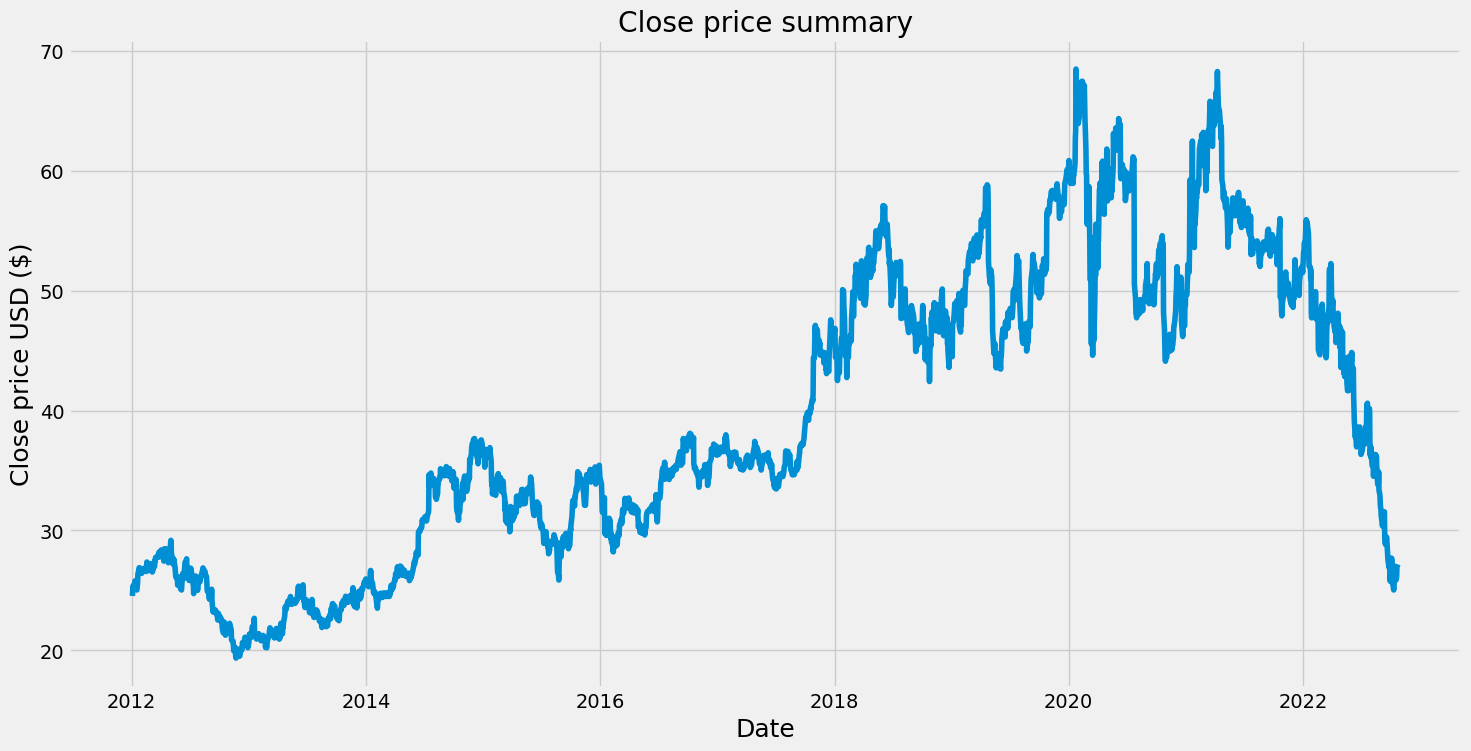

In [4]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price summary')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [5]:
#create a new dataframe with just the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2177

In [6]:
#Scaling the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.1054775 ],
       [0.1170841 ],
       [0.12298919],
       ...,
       [0.13683566],
       [0.15495823],
       [0.15923436]])

In [7]:
#Create the training dataset
#create a scaled dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into X_train and y_train datasets
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(X_train)
        print(y_train)
        print()

[array([0.1054775 , 0.1170841 , 0.12298919, 0.11993483, 0.12441455,
       0.12685806, 0.13113416, 0.13011605, 0.11769494, 0.11565873,
       0.12278556, 0.12767254, 0.14294438, 0.14966399, 0.15353286,
       0.15353286, 0.1504785 , 0.15007124, 0.15027487, 0.1437589 ,
       0.146406  , 0.14518426, 0.15027487, 0.14986762, 0.14823862,
       0.15251476, 0.15271839, 0.1494604 , 0.1494604 , 0.15108939,
       0.14701689, 0.1521075 , 0.16310324, 0.15882711, 0.15007124,
       0.14864588, 0.1494604 , 0.15332923, 0.1604561 , 0.1531256 ,
       0.15271839, 0.15394012, 0.14620241, 0.14762777, 0.15373649,
       0.15231113, 0.15699448, 0.15536549, 0.16554671, 0.16493583,
       0.17084095, 0.1704337 , 0.17063733, 0.17084095, 0.17145184,
       0.17389531, 0.17348806, 0.17980044, 0.17980044, 0.17185906])]
[0.17918955666242964]



In [8]:
train_data

array([[0.1054775 ],
       [0.1170841 ],
       [0.12298919],
       ...,
       [0.60639378],
       [0.61229891],
       [0.61474238]])

In [9]:
#Convert the X_train and y_train to numpy array
X_train,y_train = np.array(X_train),np.array(y_train)

In [10]:
X_train.shape

(2117, 60)

In [11]:
#reshape the data as the GRU expects the data to be in 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2117, 60, 1)

### Building the LSTM model

In [17]:
model = Sequential()
model.add(GRU(2, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [18]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
model.fit(X_train,y_train,batch_size=1,epochs=4)

Epoch 1/4
2117/2117 [==============================] - 13s 6ms/step - loss: 0.0164
Epoch 2/4
2117/2117 [==============================] - 13s 6ms/step - loss: 0.0028
Epoch 3/4
2117/2117 [==============================] - 13s 6ms/step - loss: 0.0020
Epoch 4/4
2117/2117 [==============================] - 13s 6ms/step - loss: 0.0016


In [20]:
#Creating the testing dataset
#Create a new array containing scaled value from index 2117 to 2721
test_data = scaled_data[training_data_len-60:,:]
#create the dataset X_test,y_test
X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [21]:
#CONVERT THE DATA INTO A np.array
X_test = np.array(X_test)

In [22]:
X_test.shape

(544, 60)

In [23]:
#Reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(544, 60, 1)

In [24]:
#Getting the model predicted price value
predictions = model.predict(X_test)

17/17 [==============================] - 0s 2ms/step


In [25]:
predictions=scalar.inverse_transform(predictions)

In [26]:
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.1567841873449438

/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_40021/2628329274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


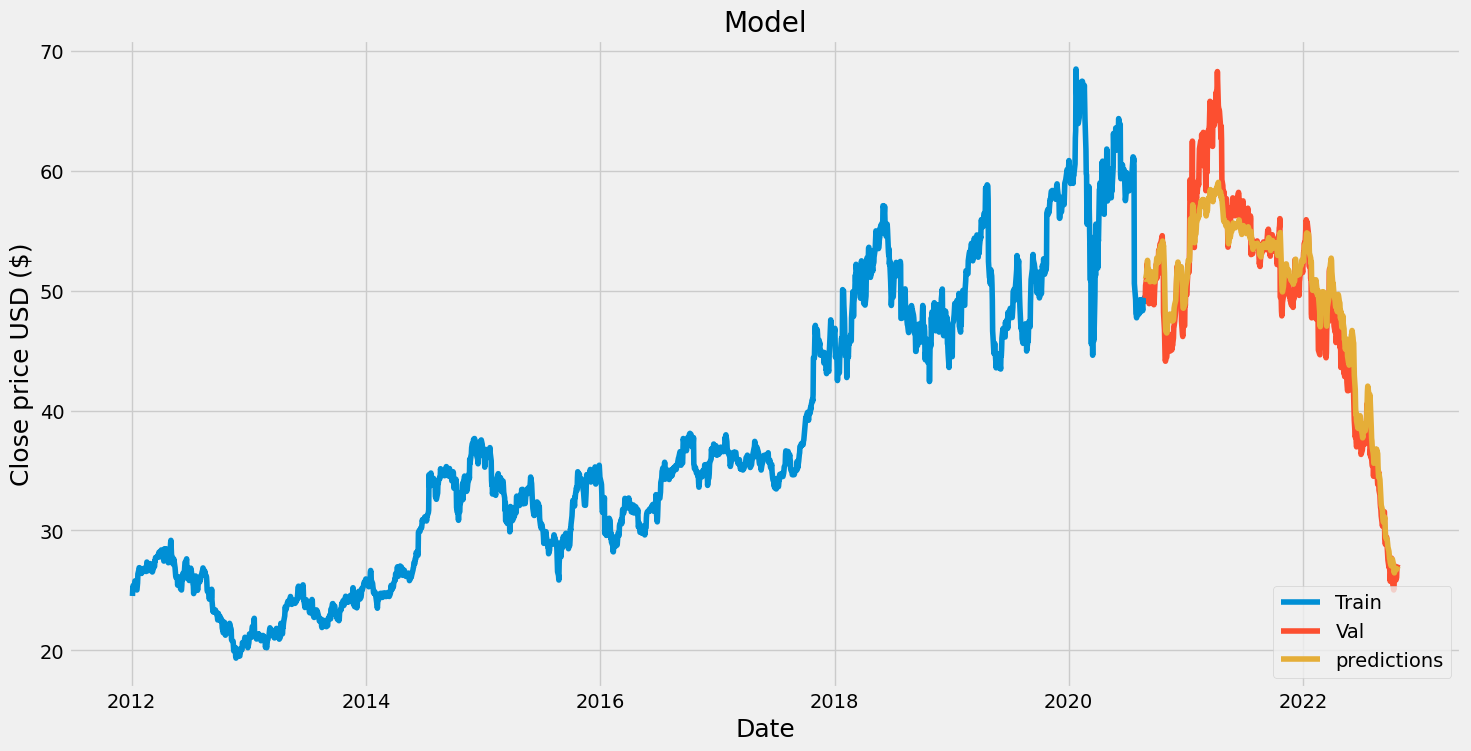

In [27]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [28]:
#Show the valid and predicted price
valid

,Close,predictions
Date,,
2020-08-27,49.400002,50.965336
2020-08-28,50.430000,50.939930
2020-08-31,50.950001,51.382538
2020-09-01,50.790001,51.807674
2020-09-02,52.250000,51.897533
...,...,...
2022-10-18,25.870001,26.819441
2022-10-19,26.000000,26.775364
2022-10-20,26.080000,26.769217


In [29]:
#Get the quote 
intel_quote = web.DataReader("INTC",data_source='yahoo',start='2012-01-01',end='2019-12-17')
#Create a new dataframe
new_df = intel_quote.filter(['Close'])
#get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to 3D
X_test == np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 232ms/step
[[55.61815]]


In [30]:
intel_quote2 = web.DataReader("INTC",data_source='yahoo',start='2019-12-17',end='2019-12-17')
print(intel_quote2['Close'])

Date
2019-12-17    57.299999
Name: Close, dtype: float64


In [31]:
57.299-55.618

1.6809999999999974

Based on our analysis, the difference in predicted close and the actual close is a difference of $1.09